<a href="https://colab.research.google.com/github/RituAnilkumar/nnrms/blob/main/day3/image_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Filtering

Link to exercise: https://colab.research.google.com/drive/1FPsbrS8AR5xSTHp9TIrj7ECb3SUfKEuK?usp=sharing

In this exercise, we will try apply apply a low pass filter (smoothing/mean filter) and a high pass filter (sharpening/edge detection filter) to a raster image. I have uploaded a scene of Assam for the purpose. First, let's import all libraries and install the rasterio library.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 39.9 MB/s eta 0:00:00


In [3]:
import rasterio as rst

Access the data uploaded in the Github link of the course and open the landsat_nir.tif file using Rasterio. We will also convert the image into numpy using Rasterio's read function. This procedure is as as described in the previous lectures

In [4]:
# The below command is to access the data for the tutorial. You may follow the link to explore.
!git clone https://github.com/RituAnilkumar/nnrms.git

Cloning into 'nnrms'...
remote: Enumerating objects: 116, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 116 (delta 10), reused 0 (delta 0), pack-reused 94
Receiving objects: 100% (116/116), 33.77 MiB | 26.56 MiB/s, done.
Resolving deltas: 100% (47/47), done.


In [5]:
dataset=rst.open('/content/nnrms/day3/landsat_nir.tif')

In [6]:
im_np=dataset.read()
im_np.shape

(1, 879, 878)

We now see that we have the dataset as a numpy array. We can plot the image using imshow as described in the previous lectures

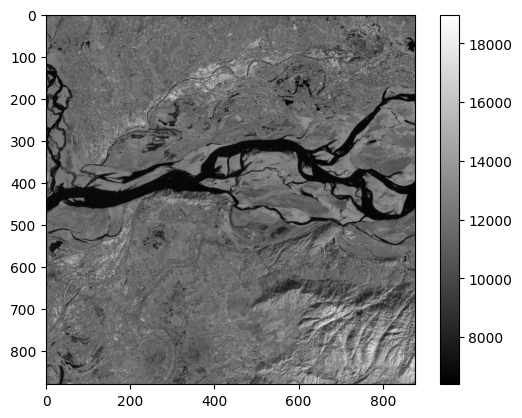

In [7]:
plt.imshow(im_np[0,:,:],cmap='gray')
plt.colorbar()

Filters in Python can be applied using a tool called open CV (computer vision). This can be imported as cv2

In [8]:
import cv2

The open CV library has a function called filter2D which will allow us to apply a filter on any given image. The filter2D function requires inputs of the image in numpy format, the depth of the image (number of bands) and the filter itself

In [9]:
filt=np.ones((3,3))/9
filt

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [10]:
img_smooth=cv2.filter2D(im_np[0,:,:],-1,filt)

In [11]:
img_smooth.shape

(879, 878)

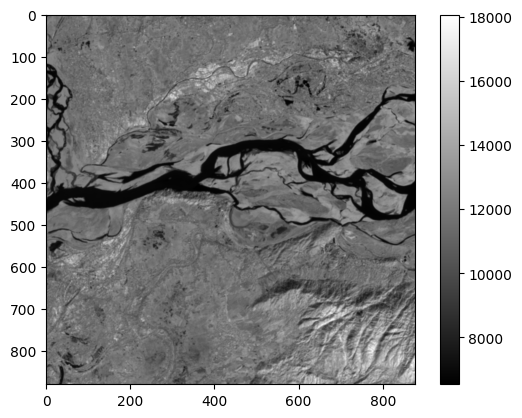

In [12]:
plt.imshow(img_smooth[:,:],cmap='gray')
plt.colorbar()

The difference might not be evident. Try implementing for a filter with size 11 by 11 to see a marked change

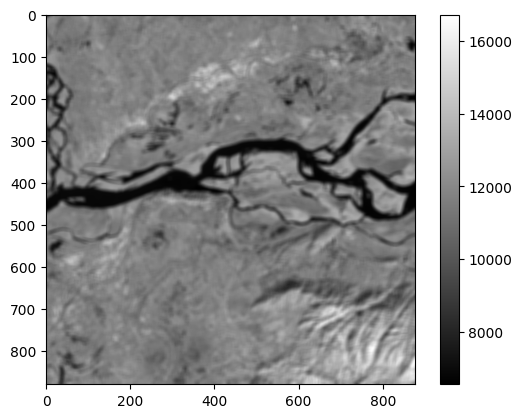

In [13]:
filt2=np.ones((11,11))/121
img_smooth2=cv2.filter2D(im_np[0,:,:],-1,filt2)
plt.imshow(img_smooth2[:,:],cmap='gray')
plt.colorbar()

We can also apply a sharpening filter using the same function

In [14]:
filt_sharp=np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])

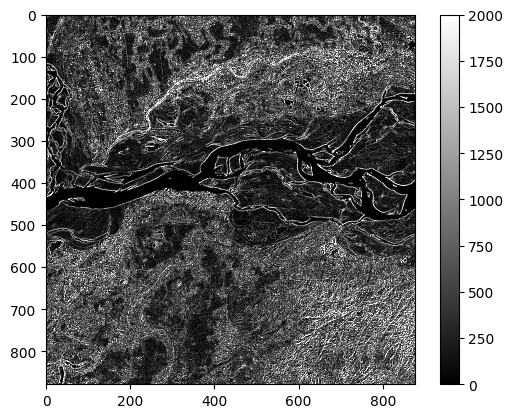

In [15]:
img_sharp=cv2.filter2D(im_np[0,:,:],-1,filt_sharp)
plt.imshow(img_sharp[:,:],cmap='gray',vmin=0,vmax=2000)
plt.colorbar()

The Laplacian filter of cv2 can also be used for the filtering exercise in addition to a number of other filters. See the open CV documentation for more details: https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html

In [16]:
im_lap=cv2.Laplacian(im_np[0,:,:],-1)

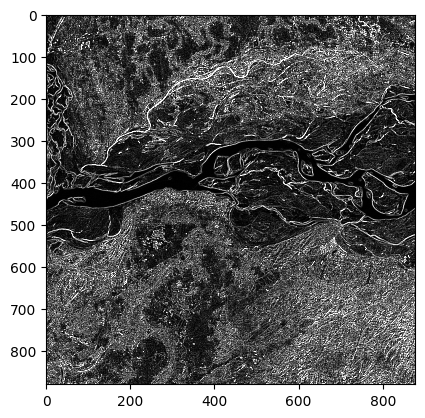

In [17]:
plt.imshow(im_lap[:,:],cmap='gray',vmin=0,vmax=2000)